In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import lasio


## Import Data

In [3]:
las1= lasio.read("well-log-data/15_9-13.las")

# Explore Data
**Check and study Header**

In [4]:
las1.header

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr=""),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="")],
 'Well': [HeaderItem(mnemonic="STRT", unit="m", value="25.0", descr=""),
  HeaderItem(mnemonic="STOP", unit="m", value="3283.9641113", descr=""),
  HeaderItem(mnemonic="STEP", unit="m", value="0.152", descr=""),
  HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr=""),
  HeaderItem(mnemonic="COMP", unit="", value="", descr="COMPANY"),
  HeaderItem(mnemonic="WELL", unit="", value="15/9-13 Sleipner East Appr", descr"),
  HeaderItem(mnemonic="FLD", unit="", value="", descr="FIELD"),
  HeaderItem(mnemonic="LOC", unit="", value="", descr="LOCATION"),
  HeaderItem(mnemonic="SRVC", unit="", value="", descr="SERVICE COMPANY"),
  HeaderItem(mnemonic="DATE", unit="", value="2020-08-09 20:01:10   : Log Export"),
  HeaderItem(mnemonic="PROV", unit="", value="", descr="PROVINCE"),
  HeaderItem(mnemonic="UWI", unit="", value="15/9-13", descr="UNIQUE WELL I

**Check header units**

In [5]:
for curve in las1.curves:
    print(curve.unit)

m
_
_
in
_
m/h
ohm.m
ohm.m
ohm.m
ohm.m
mV
us/ft
m3/m3
b/e
gAPI
g/cm3
g/cm3
_
_
_
_


**Convert LAS file to a dataframe**

In [6]:
well_data1=las1.df()
well_data1.reset_index(inplace=True)


In [7]:
curves= las1.curves
for curveitem in curves:
    for column in well_data1:
        if column== curveitem.mnemonic:
            well_data1.columns = well_data1.columns.str.replace(column,column + "("+ curveitem.unit + ")")
well_data1

,DEPT(m),FORCE_2020_LITHOFACIES_CONFIDENCE(_),FORCE_2020_LITHOFACIES_LITHOLOGY(_),CALI(in),MUDWEIGHT(_),ROP(m/h),RDEP(ohm.m),RSHA(ohm.m),RMED(ohm.m),RXO(ohm.m),...,DTC(us/ft),NPHI(m3/m3),PEF(b/e),GR(gAPI),RHOB(g/cm3),DRHO(g/cm3),DEPT(m)H_MD,X_LOC(_),Y_LOC(_),Z_LOC(_)
0,25.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,206.224609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25.152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,206.224625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25.304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,206.224655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,206.224670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25.608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,206.224701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21436,3283.272,NaN,NaN,NaN,NaN,NaN,8.0,NaN,7.9922,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3283.271973,437593.0,6470982.5,-3257.389893
21437,3283.424,NaN,NaN,NaN,NaN,NaN,8.0,NaN,7.9922,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3283.424072,437593.0,6470982.5,-3257.541992
21438,3283.576,NaN,NaN,NaN,NaN,NaN,8.0,NaN,7.9922,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3283.575928,437593.0,6470982.5,-3257.693848
21439,3283.728,NaN,NaN,NaN,NaN,NaN,8.0,NaN,7.9922,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3283.728027,437593.0,6470982.5,-3257.845703


# Statistical Information

**Check for missing data**

In [8]:
well_data1.isna().sum()

DEPT(m)                                     0
FORCE_2020_LITHOFACIES_CONFIDENCE(_)     3164
FORCE_2020_LITHOFACIES_LITHOLOGY(_)      3171
CALI(in)                                 3096
MUDWEIGHT(_)                             3921
ROP(m/h)                                 1144
RDEP(ohm.m)                               485
RSHA(ohm.m)                             19818
RMED(ohm.m)                               484
RXO(ohm.m)                              19814
SP(mV)                                    485
DTC(us/ft)                                159
NPHI(m3/m3)                              7336
PEF(b/e)                                 4995
GR(gAPI)                                  541
RHOB(g/cm3)                              3096
DRHO(g/cm3)                              3096
DEPT(m)H_MD                               485
X_LOC(_)                                  485
Y_LOC(_)                                  485
Z_LOC(_)                                  485
dtype: int64

**Data columns**

In [9]:
well_data1.columns

Index(['DEPT(m)', 'FORCE_2020_LITHOFACIES_CONFIDENCE(_)',
       'FORCE_2020_LITHOFACIES_LITHOLOGY(_)', 'CALI(in)', 'MUDWEIGHT(_)',
       'ROP(m/h)', 'RDEP(ohm.m)', 'RSHA(ohm.m)', 'RMED(ohm.m)', 'RXO(ohm.m)',
       'SP(mV)', 'DTC(us/ft)', 'NPHI(m3/m3)', 'PEF(b/e)', 'GR(gAPI)',
       'RHOB(g/cm3)', 'DRHO(g/cm3)', 'DEPT(m)H_MD', 'X_LOC(_)', 'Y_LOC(_)',
       'Z_LOC(_)'],
      dtype='object')

**Data description**

In [10]:
well_data1.describe()

,DEPT(m),FORCE_2020_LITHOFACIES_CONFIDENCE(_),FORCE_2020_LITHOFACIES_LITHOLOGY(_),CALI(in),MUDWEIGHT(_),ROP(m/h),RDEP(ohm.m),RSHA(ohm.m),RMED(ohm.m),RXO(ohm.m),...,DTC(us/ft),NPHI(m3/m3),PEF(b/e),GR(gAPI),RHOB(g/cm3),DRHO(g/cm3),DEPT(m)H_MD,X_LOC(_),Y_LOC(_),Z_LOC(_)
count,21441.00000,18277.000000,18270.000000,18345.000000,17520.000000,20297.000000,20956.000000,1623.000000,20957.000000,1627.000000,...,21282.000000,14105.000000,16446.000000,20900.000000,18345.000000,18345.000000,20956.000000,20956.000000,2.095600e+04,20956.000000
mean,1654.44000,1.039394,60476.696223,14.766734,0.139824,28.554482,1.934587,2.901504,1.777486,5.748493,...,132.228668,0.403497,3.467550,63.127582,2.113472,0.012935,1691.300000,437628.925584,6.470978e+06,-1666.082887
std,940.82344,0.277921,13972.748152,4.386417,0.009479,30.589891,2.759186,3.474120,2.739401,71.588789,...,33.646244,0.134053,2.576539,28.701134,0.301098,0.048039,919.542309,14.342905,3.677640e+00,919.344110
min,25.00000,1.000000,30000.000000,8.186605,0.129413,0.138586,0.352202,0.175400,0.116862,0.171424,...,55.726753,0.024330,1.010027,6.191506,1.404576,-0.679026,98.720001,437592.906250,6.470972e+06,-3257.997803
25%,839.72000,1.000000,65000.000000,12.101601,0.133007,5.249922,0.830621,0.934778,0.780284,0.934500,...,95.920670,0.314235,2.320927,41.265792,1.964058,-0.007177,895.009979,437616.375000,6.470975e+06,-2462.194214
50%,1654.44000,1.000000,65000.000000,13.896447,0.136602,31.011793,1.386364,1.473143,1.230179,1.455721,...,144.200439,0.447975,2.790998,66.990936,2.055773,0.001629,1691.299988,437636.234375,6.470978e+06,-1666.196960
75%,2469.16000,1.000000,65000.000000,18.301279,0.144990,40.664753,2.047000,3.352066,1.972084,3.464941,...,153.726254,0.506147,4.268998,82.098042,2.388569,0.020609,2487.590027,437640.937500,6.470982e+06,-869.973602
max,3283.88000,3.000000,99000.000000,23.329569,0.156973,1083.425415,168.014252,54.536583,142.606338,2000.000000,...,206.225693,0.800262,66.030319,499.022583,2.938594,0.210927,3283.879883,437642.812500,6.470984e+06,-73.719467


In [11]:
well_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21441 entries, 0 to 21440
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DEPT(m)                               21441 non-null  float64
 1   FORCE_2020_LITHOFACIES_CONFIDENCE(_)  18277 non-null  float64
 2   FORCE_2020_LITHOFACIES_LITHOLOGY(_)   18270 non-null  float64
 3   CALI(in)                              18345 non-null  float64
 4   MUDWEIGHT(_)                          17520 non-null  float64
 5   ROP(m/h)                              20297 non-null  float64
 6   RDEP(ohm.m)                           20956 non-null  float64
 7   RSHA(ohm.m)                           1623 non-null   float64
 8   RMED(ohm.m)                           20957 non-null  float64
 9   RXO(ohm.m)                            1627 non-null   float64
 10  SP(mV)                                20956 non-null  float64
 11  DTC(us/ft)     

**Graphical plot to study missing data**

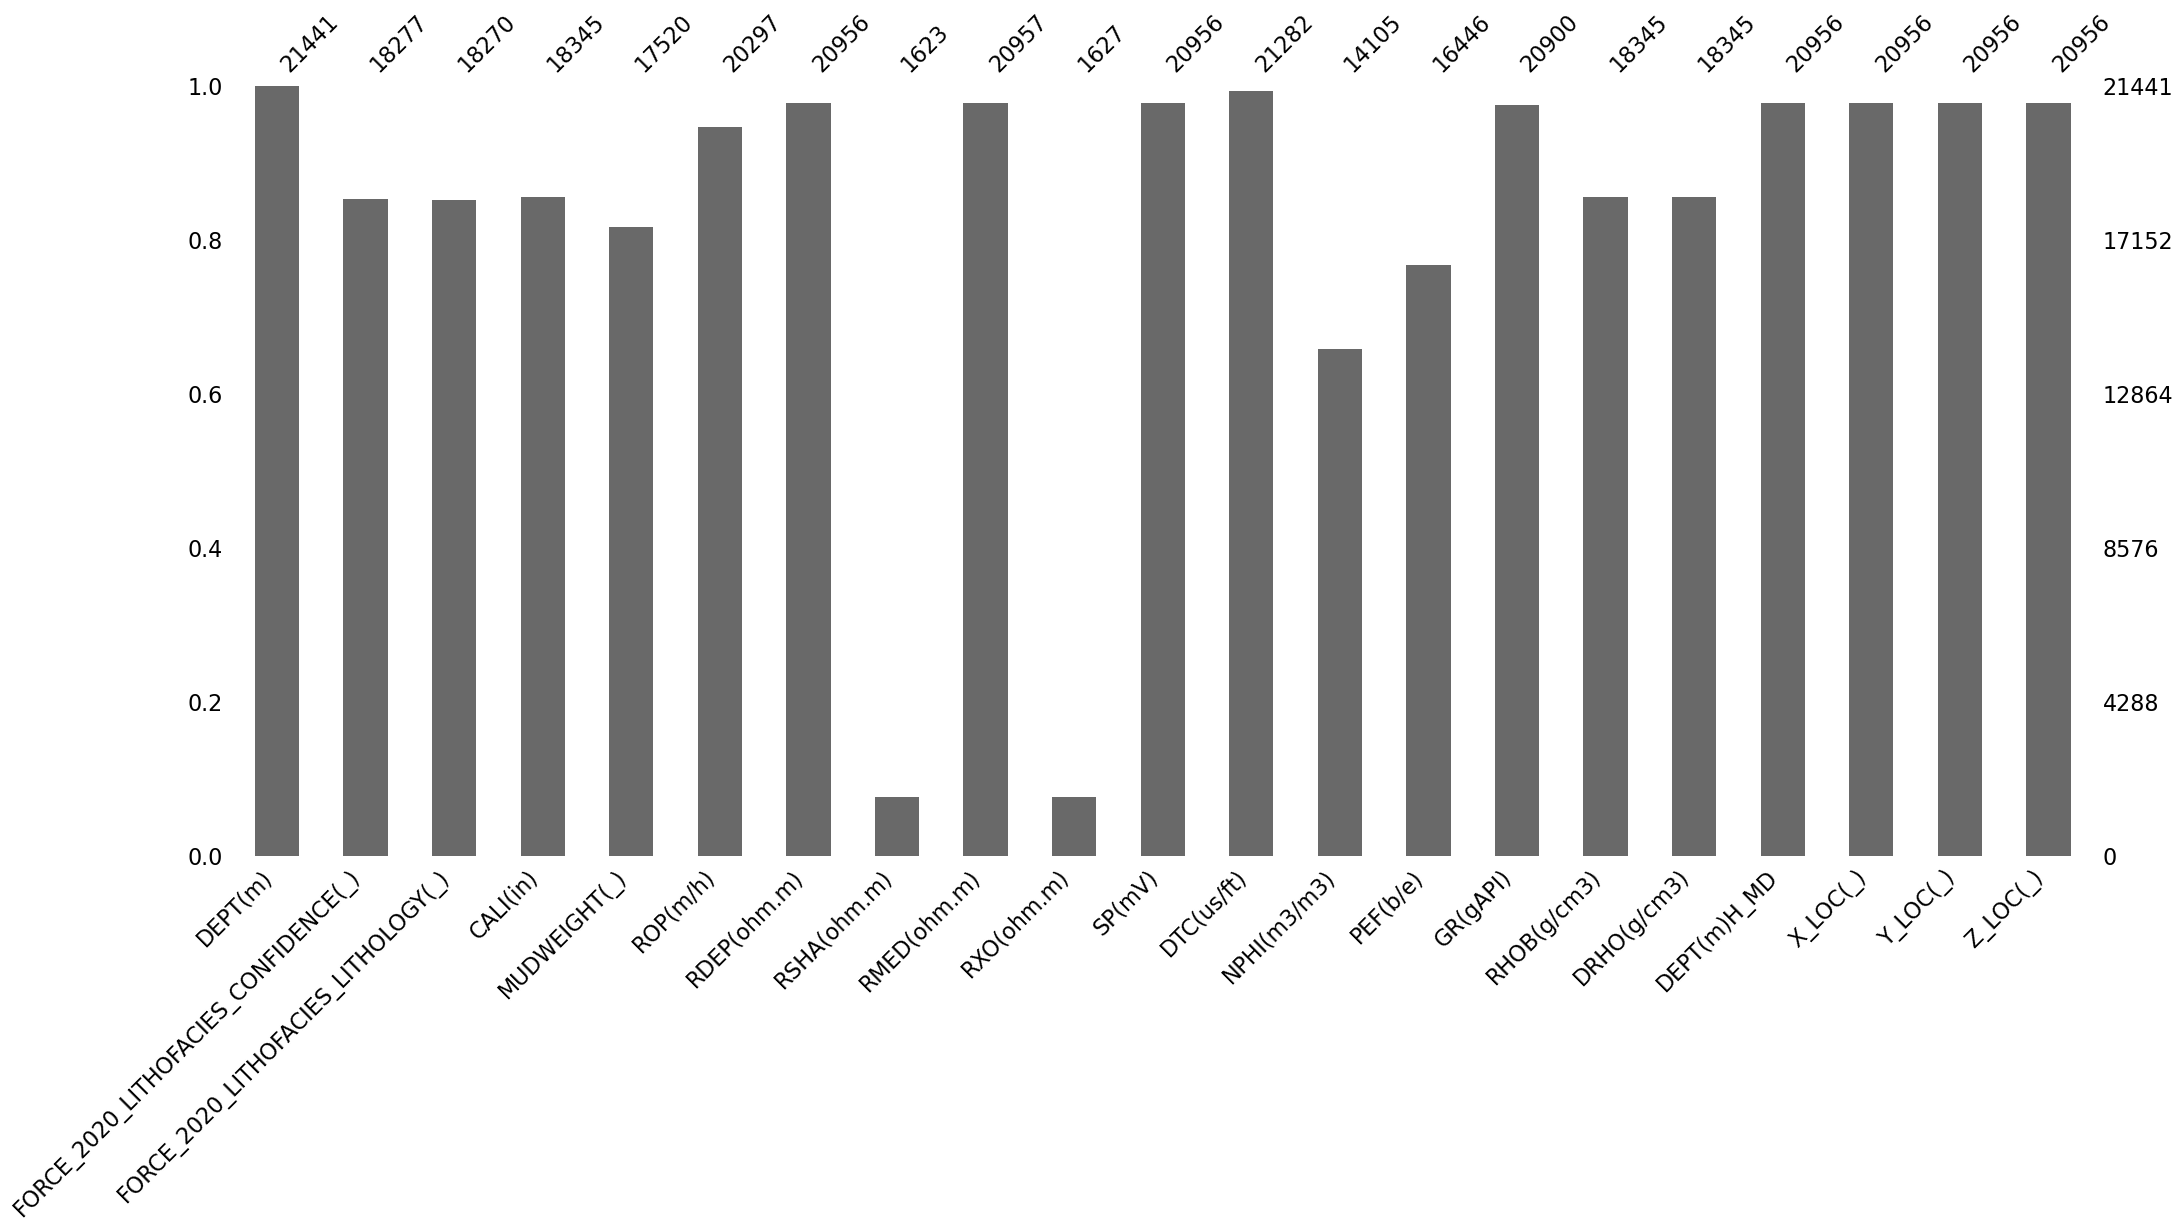

In [12]:
msno.bar(well_data1);

# Well log plot for visual interpretation
**Gamma, deep resistivity and neuro-density log**

Text(0.5, 1.0, 'North Sea Well Log')

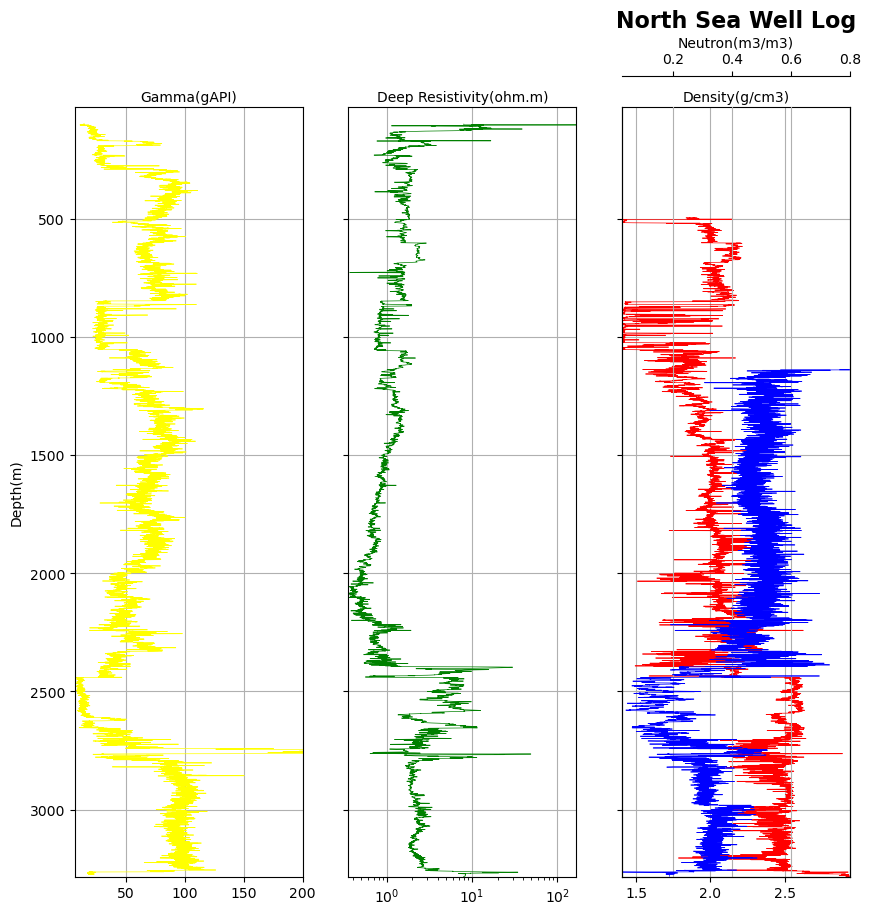

In [14]:
fig, ((ax1, ax2, ax3))= plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(10,10))
ax1.plot("GR(gAPI)", "DEPT(m)", data=well_data1, color="yellow", lw=0.5)
ax1.set(xlabel="Gamma(gAPI)",
      ylabel="Depth(m)",
       xlim=(6.191505900, 200),
       ylim=(3283.88, 25.0))
ax1.grid()

ax2.plot("RDEP(ohm.m)", "DEPT(m)", data=well_data1, color="green", lw=0.5)
ax2.semilogx()
ax2.set(xlabel="Deep Resistivity(ohm.m)",
        xlim=(0.35220173, 168.01425171),
       ylim=(3283.88, 25.0))
ax2.grid()

ax3.plot("RHOB(g/cm3)", "DEPT(m)", data=well_data1, color="red", lw=0.5)
ax3.set(xlabel="Density(g/cm3)",
        xlim=(1.4045758247, 2.9385941029),
       ylim=(3283.88, 25.0))
ax3.grid()


for ax in [ax2, ax3]:
    plt.setp(ax.get_yticklabels(), visible=False)
    
ax4=ax3.twiny()
ax4.plot("NPHI(m3/m3)", "DEPT(m)", data=well_data1, color="blue", lw=0.5)
ax4.set(xlabel="Neutron(m3/m3)",
        xlim=(0.0243302025, 0.8002619743),
       ylim=(3283.88, 25.0))
ax4.grid()

ax1.xaxis.set_label_position("top")
ax2.xaxis.set_label_position("top")
ax3.xaxis.set_label_position("top")

plt.title("North Sea Well Log", fontsize=16, fontweight='bold', color='black')

ax4.spines["top"].set_position(("axes", 1.04))

plt.title("North Sea Well Log", fontsize=16, fontweight='bold', color='black', loc="center")

**SP and DTC log**

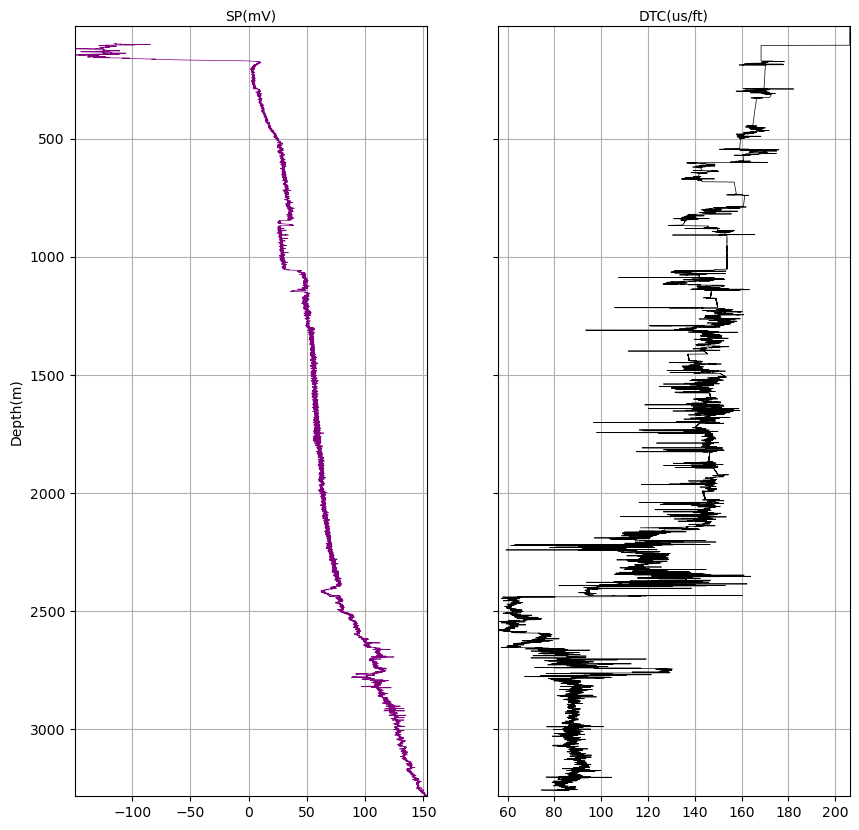

In [45]:
fig, (ax1, ax2)=plt.subplots(nrows=1,
                            ncols=2,
                            figsize=(10,10))
ax1.plot("SP(mV)", "DEPT(m)", data=well_data1, color="purple", lw=0.5)
ax1.set(xlabel="SP(mV)",
        ylabel="Depth(m)",
        xlim=(-149.232254, 153.09680176),
       ylim=(3283.88, 25.0))
ax1.grid()

ax2.plot("DTC(us/ft)", "DEPT(m)", data=well_data1, color="black", lw=0.5)
ax2.set(xlabel="DTC(us/ft)",
       xlim=(55.726753235,206.22569275),
       ylim=(3283.88, 25.0))

ax2.grid()

for ax in [ax2]:
    plt.setp(ax.get_yticklabels(), visible=False)

ax1.xaxis.set_label_position("top")
ax2.xaxis.set_label_position("top")

# Statistical Plot

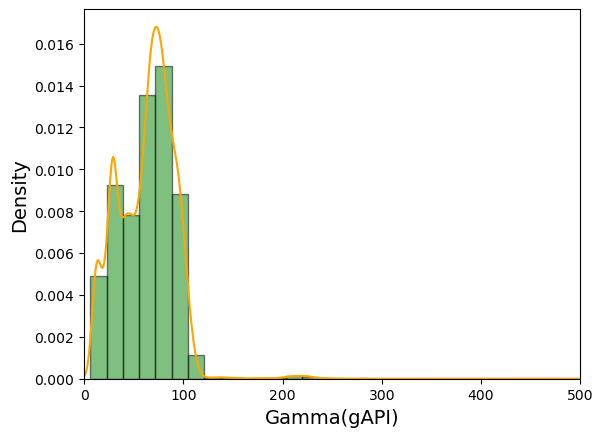

In [20]:
plt.hist(well_data1["GR(gAPI)"], bins=30, color="green", density="True", edgecolor="black", alpha=0.5)
well_data1["GR(gAPI)"].plot(kind="kde", color="orange")
plt.xlabel("Gamma(gAPI)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xlim(0,500);

In [16]:
mean= well_data1["GR(gAPI)"].mean()
p5= well_data1["GR(gAPI)"].quantile(0.05)
p95= well_data1["GR(gAPI)"].quantile(0.95)

print(f'Mean:{mean}')
print(f'Mean:{p5}')
print(f'Mean:{p95}')

Mean:63.12758151550053
Mean:15.540999269250001
Mean:100.47630157199998


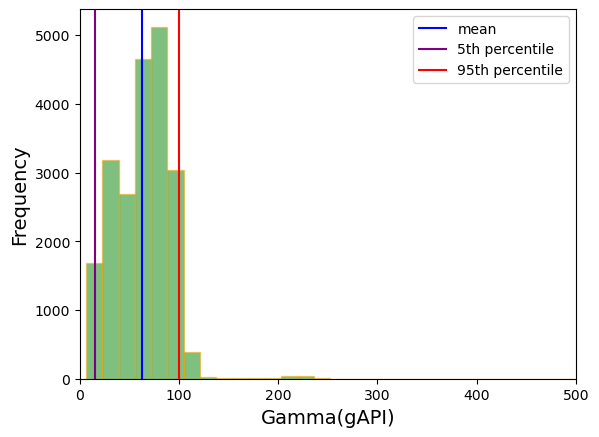

In [21]:
plt.hist(well_data1["GR(gAPI)"], bins=30, color="green", edgecolor="orange", alpha=0.5)
plt.xlabel("Gamma(gAPI)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xlim(0,500)

plt.axvline(mean,color="blue", label="mean")
plt.axvline(p5, color="purple", label="5th percentile")
plt.axvline(p95, color="red", label= "95th percentile")

plt.legend();

# DATA 2

**Import Data**

In [23]:
las2=lasio.read("well-log-data/16_8-1.las")

In [24]:
las2.header

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr=""),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="")],
 'Well': [HeaderItem(mnemonic="STRT", unit="m", value="96.975196838", descr=""),
  HeaderItem(mnemonic="STOP", unit="m", value="2313.9379883", descr=""),
  HeaderItem(mnemonic="STEP", unit="m", value="0.152", descr=""),
  HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr=""),
  HeaderItem(mnemonic="COMP", unit="", value="", descr="COMPANY"),
  HeaderItem(mnemonic="WELL", unit="", value="16/8-1", descr="WELL"),
  HeaderItem(mnemonic="FLD", unit="", value="", descr="FIELD"),
  HeaderItem(mnemonic="LOC", unit="", value="", descr="LOCATION"),
  HeaderItem(mnemonic="SRVC", unit="", value="", descr="SERVICE COMPANY"),
  HeaderItem(mnemonic="DATE", unit="", value="2020-08-09 20:01:20   : Log Export"),
  HeaderItem(mnemonic="PROV", unit="", value="", descr="PROVINCE"),
  HeaderItem(mnemonic="UWI", unit="", value="16/8-1", descr="UNIQUE WELL ID"),
  

**check data units**

In [25]:
for curve in las2.curves:
    print (curve.unit)

m
_
_
in
_
m/h
ohm.m
ohm.m
ohm.m
mV
us/ft
m3/m3
gAPI
g/cm3
g/cm3
_
_
_
_


In [26]:
well_data2=las2.df()
well_data2.reset_index(inplace=True)


In [27]:
well_data2.head()

,DEPT,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,MUDWEIGHT,ROP,RDEP,RSHA,RMED,SP,DTC,NPHI,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
0,96.975197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.3478,NaN,NaN,NaN,NaN,NaN,NaN
1,97.127197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,97.279197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,97.431197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,97.583197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Statistical Info**

In [28]:
well_data2.describe()

,DEPT,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,MUDWEIGHT,ROP,RDEP,RSHA,RMED,SP,DTC,NPHI,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
count,14586.000000,6700.000000,6685.000000,6709.000000,13706.000000,14418.000000,11888.000000,11888.000000,11887.000000,11888.000000,13935.000000,4987.000000,14540.000000,6709.000000,6712.000000,11888.000000,11888.000000,1.188800e+04,11888.000000
mean,1205.435197,1.317015,67808.931638,13.874441,1.273399,7.995180,1.193640,0.994535,0.994635,40.124072,142.993971,0.385731,57.878430,2.195637,0.003628,1409.267197,466867.024736,6.479870e+06,-1384.008547
std,640.035497,0.698308,16871.506647,1.412255,0.114061,9.065649,1.608995,0.376899,0.376817,4.981009,27.383534,0.073953,17.111394,0.179500,0.027285,521.650979,4.863292,2.434936e+00,521.516433
min,96.975197,1.000000,30000.000000,8.032369,1.042490,0.897100,0.202688,0.199000,0.199211,-0.202354,68.890518,0.163606,7.347800,1.660383,-0.270500,505.855194,466860.312500,6.479866e+06,-2287.216797
25%,651.205197,1.000000,65000.000000,13.027784,1.270160,3.025161,0.768788,0.694905,0.695282,39.476396,128.222610,0.335906,48.364012,2.037908,-0.005298,957.561188,466862.375000,6.479868e+06,-1835.581330
50%,1205.435197,1.000000,65000.000000,13.724551,1.318090,5.178600,0.977611,0.939058,0.937659,40.766449,146.981216,0.387298,61.446045,2.196245,0.004998,1409.267151,466866.625000,6.479870e+06,-1384.011413
75%,1759.665197,1.000000,80000.000000,14.744955,1.342056,10.739525,1.364540,1.251916,1.251505,42.212130,159.979073,0.443442,68.837093,2.351815,0.016459,1860.973175,466871.781250,6.479872e+06,-932.363327
max,2313.895197,3.000000,99000.000000,16.107025,1.389986,134.248199,20.513474,3.651532,3.643450,53.908363,205.605118,0.583166,150.354431,2.601920,0.109510,2312.679199,466874.656250,6.479874e+06,-480.855194


In [29]:
well_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14586 entries, 0 to 14585
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DEPT                               14586 non-null  float64
 1   FORCE_2020_LITHOFACIES_CONFIDENCE  6700 non-null   float64
 2   FORCE_2020_LITHOFACIES_LITHOLOGY   6685 non-null   float64
 3   CALI                               6709 non-null   float64
 4   MUDWEIGHT                          13706 non-null  float64
 5   ROP                                14418 non-null  float64
 6   RDEP                               11888 non-null  float64
 7   RSHA                               11888 non-null  float64
 8   RMED                               11887 non-null  float64
 9   SP                                 11888 non-null  float64
 10  DTC                                13935 non-null  float64
 11  NPHI                               4987 non-null   flo

In [30]:
well_data2.isna().sum()

DEPT                                    0
FORCE_2020_LITHOFACIES_CONFIDENCE    7886
FORCE_2020_LITHOFACIES_LITHOLOGY     7901
CALI                                 7877
MUDWEIGHT                             880
ROP                                   168
RDEP                                 2698
RSHA                                 2698
RMED                                 2699
SP                                   2698
DTC                                   651
NPHI                                 9599
GR                                     46
RHOB                                 7877
DRHO                                 7874
DEPTH_MD                             2698
X_LOC                                2698
Y_LOC                                2698
Z_LOC                                2698
dtype: int64

In [31]:
well_data2.columns

Index(['DEPT', 'FORCE_2020_LITHOFACIES_CONFIDENCE',
       'FORCE_2020_LITHOFACIES_LITHOLOGY', 'CALI', 'MUDWEIGHT', 'ROP', 'RDEP',
       'RSHA', 'RMED', 'SP', 'DTC', 'NPHI', 'GR', 'RHOB', 'DRHO', 'DEPTH_MD',
       'X_LOC', 'Y_LOC', 'Z_LOC'],
      dtype='object')

**Graphical plot to study missing data**

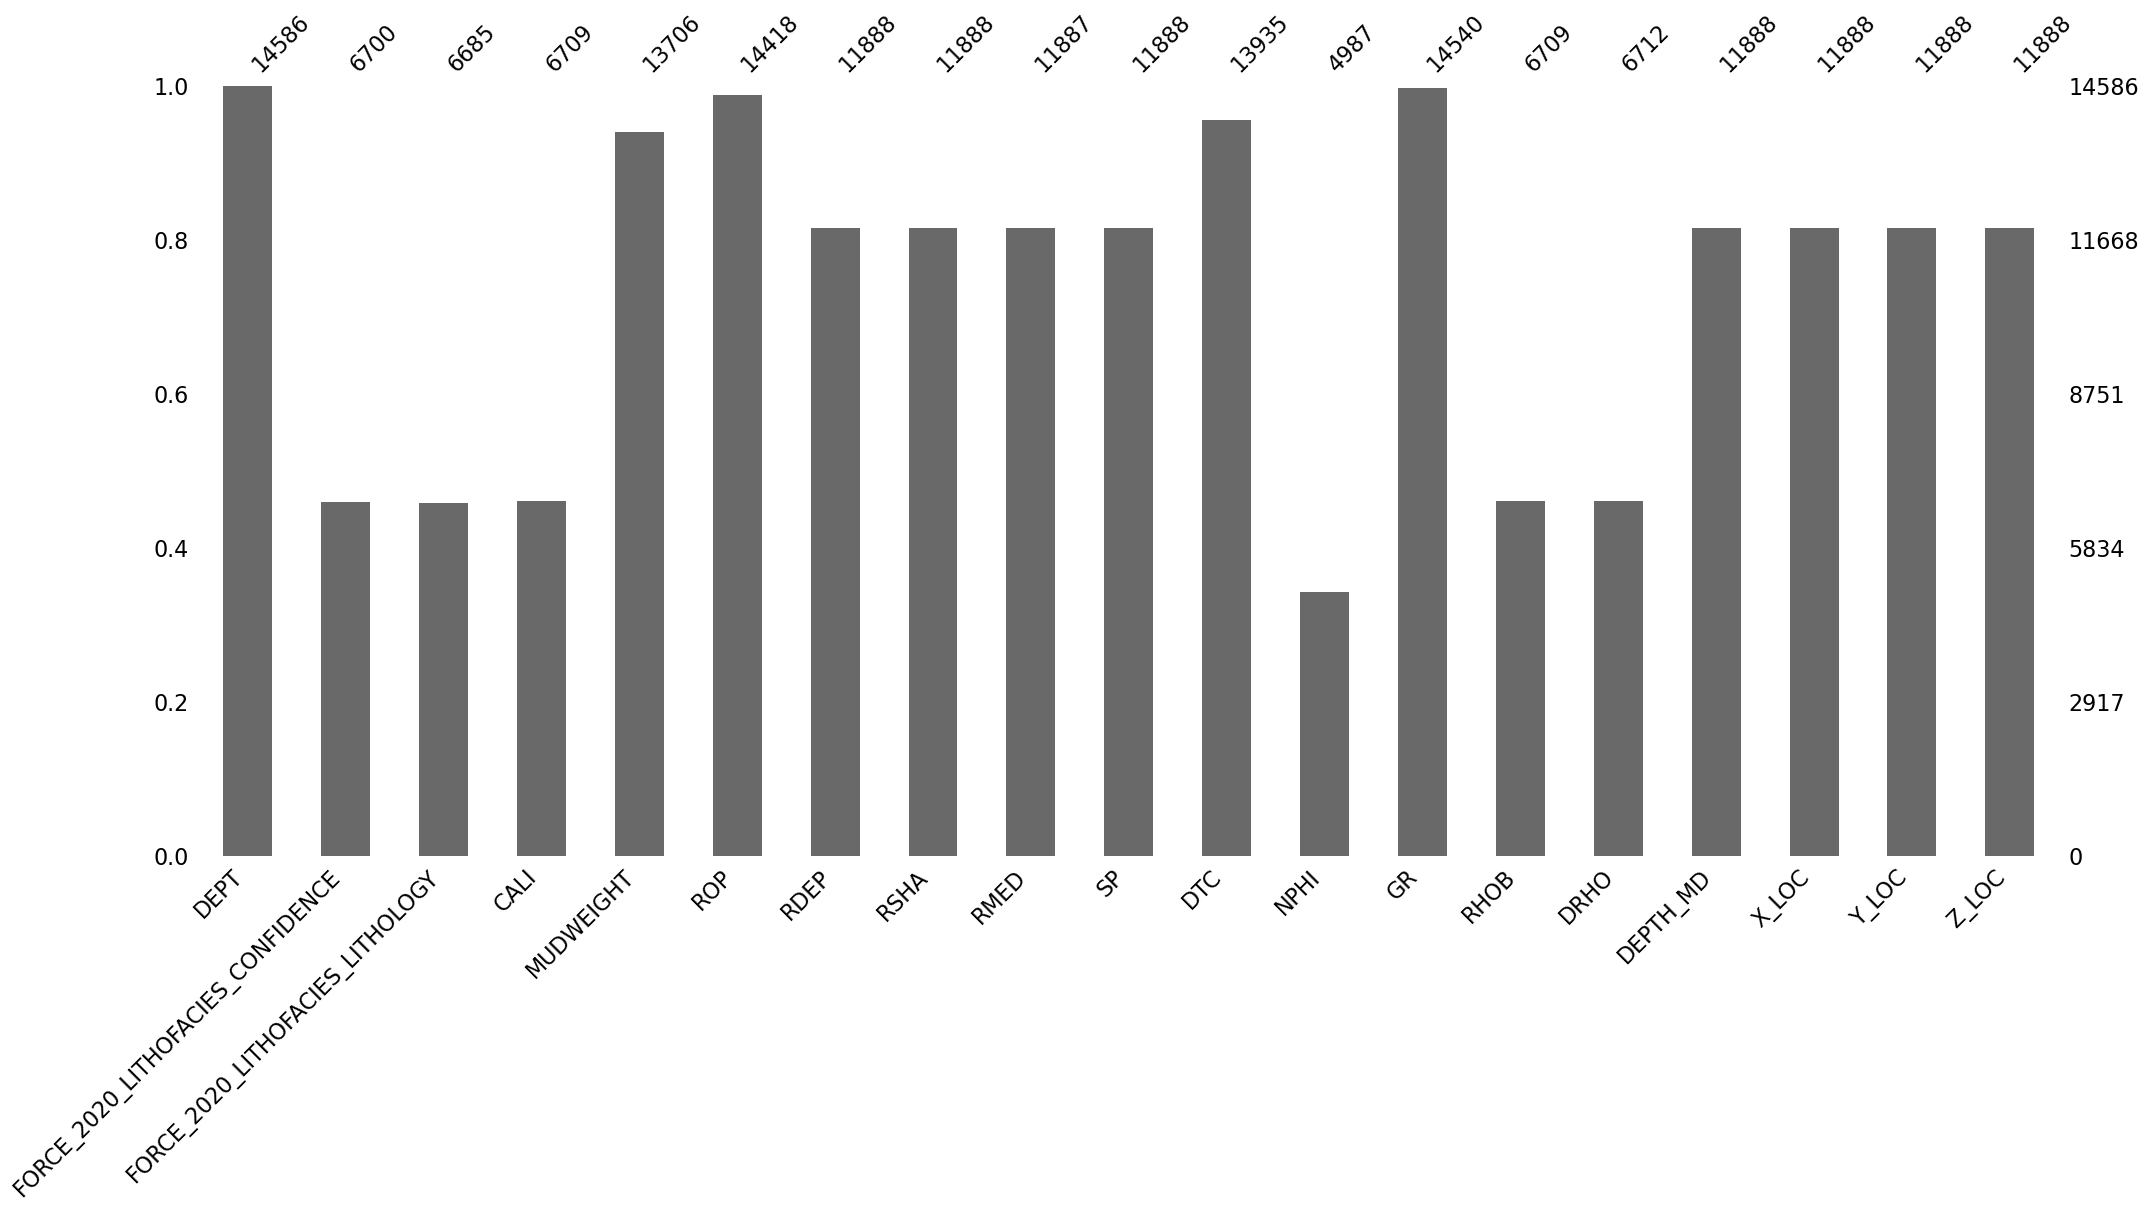

In [32]:
msno.bar(well_data2);

**Visual Representation of Well log**

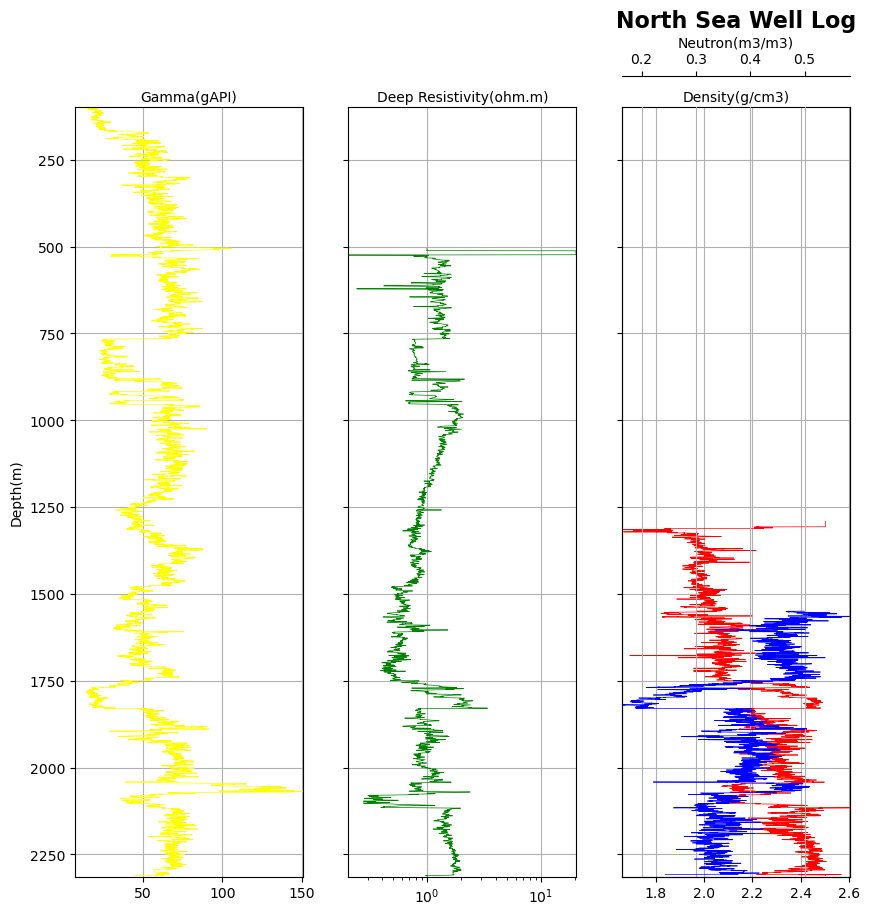

In [33]:
fig, ((ax1, ax2, ax3))= plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(10,10))
ax1.plot("GR", "DEPT", data=well_data2, color="yellow", lw=0.5)
ax1.set(xlabel="Gamma(gAPI)",
      ylabel="Depth(m)",
       xlim=(7.347799778, 150.35443115),
       ylim=(2313.8951968, 96.975196838))
ax1.grid()

ax2.plot("RDEP", "DEPT", data=well_data2, color="green", lw=0.5)
ax2.semilogx()
ax2.set(xlabel="Deep Resistivity(ohm.m)",
        xlim=(0.2026876807, 20.513473511),
       ylim=(2313.8951968, 96.975196838))
ax2.grid()

ax3.plot("RHOB", "DEPT", data=well_data2, color="red", lw=0.5)
ax3.set(xlabel="Density(g/cm3)",
        xlim=(1.6603834629, 2.6019198895),
       ylim=(2313.8951968, 96.975196838))
ax3.grid()


for ax in [ax2, ax3]:
    plt.setp(ax.get_yticklabels(), visible=False)
    
ax4=ax3.twiny()
ax4.plot("NPHI", "DEPT", data=well_data2, color="blue", lw=0.5)
ax4.set(xlabel="Neutron(m3/m3)",
        xlim=(0.163605839, 0.5831662416),
       ylim=(2313.8951968, 96.975196838))
ax4.grid()

ax1.xaxis.set_label_position("top")
ax2.xaxis.set_label_position("top")
ax3.xaxis.set_label_position("top")


plt.title("North Sea Well Log", fontsize=16, fontweight='bold', color='black')

ax4.spines["top"].set_position(("axes", 1.04))

plt.title("North Sea Well Log", fontsize=16, fontweight='bold', color='black', loc="center");

**SP and DTC log**

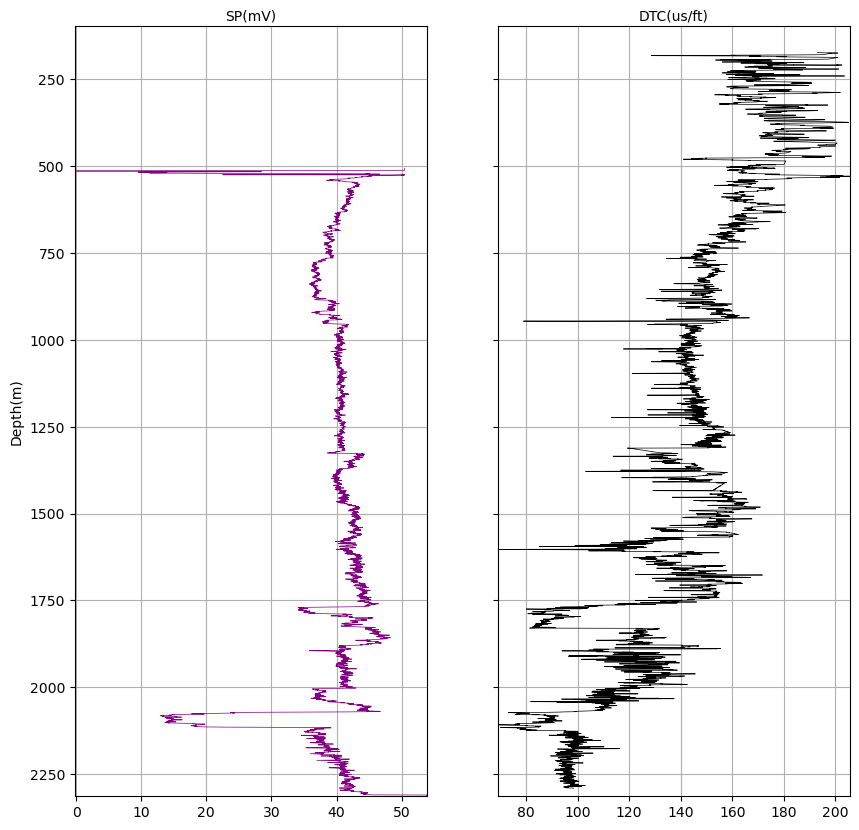

In [34]:
fig, (ax1, ax2)=plt.subplots(nrows=1,
                            ncols=2,
                            figsize=(10,10))
ax1.plot("SP", "DEPT", data=well_data2, color="purple", lw=0.5)
ax1.set(xlabel="SP(mV)",
        ylabel="Depth(m)",
        xlim=(-0.202354312, 53.908363342),
       ylim=(2313.8951968, 96.975196838))
ax1.grid()

ax2.plot("DTC", "DEPT", data=well_data2, color="black", lw=0.5)
ax2.set(xlabel="DTC(us/ft)",
       xlim=(68.890518188,205.6051178),
       ylim=(2313.8951968, 96.975196838))

ax2.grid()

for ax in [ax2]:
    plt.setp(ax.get_yticklabels(), visible=False)

ax1.xaxis.set_label_position("top")
ax2.xaxis.set_label_position("top")

# Statistical Plot

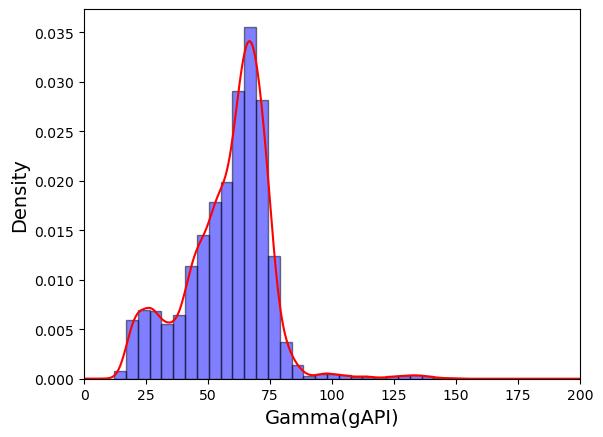

In [35]:
plt.hist(well_data2["GR"], bins=30, color="blue", density="True", edgecolor="black", alpha=0.5)
well_data2["GR"].plot(kind="kde", color="red")
plt.xlabel("Gamma(gAPI)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xlim(0,200);

In [36]:
mean= well_data2["GR"].mean()
p5= well_data2["GR"].quantile(0.05)
p95= well_data2["GR"].quantile(0.95)

print(f'Mean:{mean}')
print(f'Mean:{p5}')
print(f'Mean:{p95}')

Mean:57.878429855146216
Mean:24.2509476657
Mean:77.40942687955


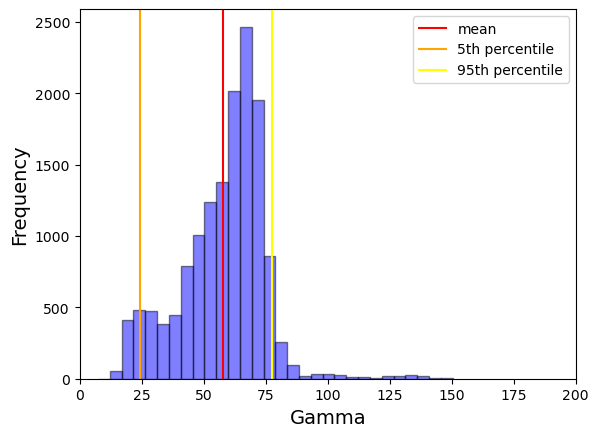

In [37]:
plt.hist(well_data2["GR"], bins=30, color="blue", edgecolor="black", alpha=0.5)
plt.xlabel("Gamma", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xlim(0,200)

plt.axvline(mean,color="red", label="mean")
plt.axvline(p5, color="orange", label="5th percentile")
plt.axvline(p95, color="yellow", label= "95th percentile")

plt.legend();